In [762]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [763]:
df1=pd.read_csv('goodreads_books1 .csv')
df2=pd.read_csv('goodreads_books2 .csv')
df3=pd.read_csv('goodreads_books3.csv')

In [764]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(3944, 8)
(4000, 8)
(802, 8)


In [765]:
# Concatenate the three DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Print the shape of the combined DataFrame
print(combined_df.shape)


(8746, 8)


In [766]:
# Drop duplicate rows
combined_df = combined_df.drop_duplicates()

# Print the shape of the DataFrame after removing duplicates
print(combined_df.shape)

(7756, 8)


In [767]:
 # Assuming you're using pandas

# Replace 'Not available' with NaN in the entire DataFrame
combined_df=combined_df.replace('Not available', pd.NA)

In [768]:
combined_df=combined_df.dropna()

In [769]:
# Save the DataFrame to a CSV file
combined_df.to_csv('all_data.csv', index=False)

In [770]:

def add_spaces_before_capital(text):
  return ''.join([' ' + char if char.isupper() else char for char in text]).strip()

# Example usage

combined_df['Genre'] = combined_df['Genre'].apply(add_spaces_before_capital)
  # Output: I Am Going To School

In [771]:
combined_df

,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info
0,Genres Fiction Historical Fiction School Lite...,"First published July 11, 1960",Harper Lee,To Kill a Mockingbird,4.26,"6,296,391 ratings","120,579 reviews",Harper Lee82 books13.7k followers
1,Genres Classics Fiction Science Fiction Dysto...,"First published June 8, 1949",George Orwell,1984,4.19,"4,761,335 ratings","122,911 reviews","George Orwell1,404 books45.3k followers"
2,Genres Fiction School Historical Fiction Roma...,"First published April 10, 1925",F. Scott Fitzgerald,The Great Gatsby,3.93,"5,365,833 ratings","109,920 reviews","F. Scott Fitzgerald1,933 books24.2k followers"
3,Genres Fantasy Fiction Young Adult Magic Chil...,"First published June 26, 1997",J.K. Rowling,Harry Potter and the Sorcerer’s Stone,4.47,"10,332,287 ratings","167,714 reviews",J.K. Rowling754 books227k followers
4,Genres Classics Fiction Dystopia Fantasy Schoo...,"First published August 17, 1945",George Orwell,Animal Farm,3.99,"4,006,287 ratings","102,011 reviews","George Orwell1,404 books45.3k followers"
...,...,...,...,...,...,...,...,...
8741,Genres Comics Graphic Novels Bande Dessinée ...,"First published January 1, 1983",François Schuiten,Les murailles de Samaris,3.93,949 ratings,82 reviews,François Schuiten120 books134 followers
8742,Genres Romance Paranormal Historical Ghosts Pa...,"First published January 1, 1994",Mickee Madden,Everlastin',3.59,214 ratings,30 reviews,Mickee Madden27 books20 followers
8743,Genres History Nonfiction Poland Memoir Polish...,"First published January 1, 1977",Aleksander Wat,Secolul meu: confesiunile unui intelectual eur...,4.20,186 ratings,23 reviews,Aleksander Wat31 books9 followers
8744,Genres Fiction Mystery Historical Fiction Thr...,"First published December 27, 1988",Katherine Neville,The Eight,3.93,"43,688 ratings","3,214 reviews","Katherine Neville24 books1,354 followers"


In [772]:
import re
import pandas as pd
import re

# Assuming you have your DataFrame `combined_df`

combined_df['Genre'] = combined_df['Genre'].apply(lambda x: re.sub(r"[\u0600-\u06FF]", "", x))
combined_df['Genre'] = combined_df['Genre'].apply(lambda x: re.sub(r"[^\w\s]", "", x))
combined_df['Genre'] = combined_df['Genre'].apply(lambda x:  re.sub(r"\.{2,}more", "", x))
combined_df['Genre'] = combined_df['Genre'].apply(lambda x:  re.sub(r"[\d]", "", x))

print(combined_df['Genre'])

0       Genres Fiction Historical  Fiction School Lite...
1       Genres Classics Fiction Science  Fiction Dysto...
2       Genres Fiction School Historical  Fiction Roma...
3       Genres Fantasy Fiction Young  Adult Magic Chil...
4       Genres Classics Fiction Dystopia Fantasy Schoo...
                              ...                        
8741    Genres Comics Graphic  Novels Bande  Dessinée ...
8742    Genres Romance Paranormal Historical Ghosts Pa...
8743    Genres History Nonfiction Poland Memoir Polish...
8744    Genres Fiction Mystery Historical  Fiction Thr...
8745    Genres Comics Graphic  Novels Bande  Dessinée ...
Name: Genre, Length: 7630, dtype: object


In [773]:
combined_df['Title'] = combined_df['Title'].apply(lambda x: re.sub(r"[\u0600-\u06FF]", "", x))
combined_df['Title'] = combined_df['Title'].apply(lambda x:  re.sub(r"[\d]", "", x))
combined_df['Title'] = combined_df['Title'].apply(lambda x: re.sub(r"[^\w\s]", "", x))
import re
import html
def clean_text(text):
  if isinstance(text, str):
        text= ' '.join([word for word in text.split() if len(word) >= 3])
  text = re.sub(r'\b\w\b', ' ', text)
  text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = html.unescape(text)
  return ' '.join(text.split())

# Apply the function to the desired column (e.g., 'Title')
combined_df['Title'] = combined_df['Title'].apply(clean_text)
combined_df['Author'] = combined_df['Author'].apply(clean_text)

  # Output: "This is a text with special characters"
print(combined_df['Title'])

0                                        Kill Mockingbird
1                                                        
2                                        The Great Gatsby
3                    Harry Potter and the Sorcerers Stone
4                                             Animal Farm
                              ...                        
8741                                Les murailles Samaris
8742                                           Everlastin
8743    Secolul meu confesiunile unui intelectual euro...
8744                                            The Eight
8745                                       Fever Urbicand
Name: Title, Length: 7630, dtype: object


In [774]:
combined_df = combined_df.replace('', pd.NA).dropna()

In [775]:
def remove_first_word(text):
  return text[text.find(' ') + 1:]
combined_df['Genre'] = combined_df['Genre'].apply(remove_first_word)

In [776]:
combined_df

,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info
0,Fiction Historical Fiction School Literature ...,"First published July 11, 1960",Harper Lee,Kill Mockingbird,4.26,"6,296,391 ratings","120,579 reviews",Harper Lee82 books13.7k followers
2,Fiction School Historical Fiction Romance Lit...,"First published April 10, 1925",Scott Fitzgerald,The Great Gatsby,3.93,"5,365,833 ratings","109,920 reviews","F. Scott Fitzgerald1,933 books24.2k followers"
3,Fantasy Fiction Young Adult Magic Childrens M...,"First published June 26, 1997",Rowling,Harry Potter and the Sorcerers Stone,4.47,"10,332,287 ratings","167,714 reviews",J.K. Rowling754 books227k followers
4,Classics Fiction Dystopia Fantasy School Liter...,"First published August 17, 1945",George Orwell,Animal Farm,3.99,"4,006,287 ratings","102,011 reviews","George Orwell1,404 books45.3k followers"
5,Fantasy Classics Fiction Adventure Young Adul...,"First published September 21, 1937",Tolkien,The Hobbit,4.29,"4,093,261 ratings","74,435 reviews",J.R.R. Tolkien549 books72.3k followers
...,...,...,...,...,...,...,...,...
8741,Comics Graphic Novels Bande Dessinée Fantasy...,"First published January 1, 1983",Fran ois Schuiten,Les murailles Samaris,3.93,949 ratings,82 reviews,François Schuiten120 books134 followers
8742,Romance Paranormal Historical Ghosts Paranorma...,"First published January 1, 1994",Mickee Madden,Everlastin,3.59,214 ratings,30 reviews,Mickee Madden27 books20 followers
8743,History Nonfiction Poland Memoir Polish Liter...,"First published January 1, 1977",Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186 ratings,23 reviews,Aleksander Wat31 books9 followers
8744,Fiction Mystery Historical Fiction Thriller F...,"First published December 27, 1988",Katherine Neville,The Eight,3.93,"43,688 ratings","3,214 reviews","Katherine Neville24 books1,354 followers"


In [777]:
def replace_space_with_comma(text):
  return text.replace(' ', ',')

combined_df['Genre'] = combined_df['Genre'].apply(replace_space_with_comma)

In [778]:
combined_df

,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info
0,"Fiction,Historical,,Fiction,School,Literature,...","First published July 11, 1960",Harper Lee,Kill Mockingbird,4.26,"6,296,391 ratings","120,579 reviews",Harper Lee82 books13.7k followers
2,"Fiction,School,Historical,,Fiction,Romance,Lit...","First published April 10, 1925",Scott Fitzgerald,The Great Gatsby,3.93,"5,365,833 ratings","109,920 reviews","F. Scott Fitzgerald1,933 books24.2k followers"
3,"Fantasy,Fiction,Young,,Adult,Magic,Childrens,M...","First published June 26, 1997",Rowling,Harry Potter and the Sorcerers Stone,4.47,"10,332,287 ratings","167,714 reviews",J.K. Rowling754 books227k followers
4,"Classics,Fiction,Dystopia,Fantasy,School,Liter...","First published August 17, 1945",George Orwell,Animal Farm,3.99,"4,006,287 ratings","102,011 reviews","George Orwell1,404 books45.3k followers"
5,"Fantasy,Classics,Fiction,Adventure,Young,,Adul...","First published September 21, 1937",Tolkien,The Hobbit,4.29,"4,093,261 ratings","74,435 reviews",J.R.R. Tolkien549 books72.3k followers
...,...,...,...,...,...,...,...,...
8741,"Comics,Graphic,,Novels,Bande,,Dessinée,Fantasy...","First published January 1, 1983",Fran ois Schuiten,Les murailles Samaris,3.93,949 ratings,82 reviews,François Schuiten120 books134 followers
8742,"Romance,Paranormal,Historical,Ghosts,Paranorma...","First published January 1, 1994",Mickee Madden,Everlastin,3.59,214 ratings,30 reviews,Mickee Madden27 books20 followers
8743,"History,Nonfiction,Poland,Memoir,Polish,,Liter...","First published January 1, 1977",Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186 ratings,23 reviews,Aleksander Wat31 books9 followers
8744,"Fiction,Mystery,Historical,,Fiction,Thriller,F...","First published December 27, 1988",Katherine Neville,The Eight,3.93,"43,688 ratings","3,214 reviews","Katherine Neville24 books1,354 followers"


In [779]:
import re

def replace_commas_after_historical(text):
  return re.sub(r'Historical,+([^A-Z]*[A-Z])', r'Historical \1', text)

combined_df['Genre'] = combined_df['Genre'].apply(replace_commas_after_historical)

In [780]:
combined_df['Genre']

,Genre
0,"Fiction,Historical Fiction,School,Literature,Y..."
2,"Fiction,School,Historical Fiction,Romance,Lite..."
3,"Fantasy,Fiction,Young,,Adult,Magic,Childrens,M..."
4,"Classics,Fiction,Dystopia,Fantasy,School,Liter..."
5,"Fantasy,Classics,Fiction,Adventure,Young,,Adul..."
...,...
8741,"Comics,Graphic,,Novels,Bande,,Dessinée,Fantasy..."
8742,"Romance,Paranormal,Historical Ghosts,Paranorma..."
8743,"History,Nonfiction,Poland,Memoir,Polish,,Liter..."
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa..."


In [781]:
def replace_commas_after_historical(text):
  return re.sub(r'School,+([^A-Z]*[A-Z])', r'School \1', text)

combined_df['Genre'] = combined_df['Genre'].apply(replace_commas_after_historical)

In [782]:
def replace_double_comma(text):
  return text.replace(',,', ',')

combined_df['Genre'] = combined_df['Genre'].apply(replace_double_comma)

In [783]:
combined_df['Genre']

,Genre
0,"Fiction,Historical Fiction,School Literature,Y..."
2,"Fiction,School Historical Fiction,Romance,Lite..."
3,"Fantasy,Fiction,Young,Adult,Magic,Childrens,Mi..."
4,"Classics,Fiction,Dystopia,Fantasy,School Liter..."
5,"Fantasy,Classics,Fiction,Adventure,Young,Adult..."
...,...
8741,"Comics,Graphic,Novels,Bande,Dessinée,Fantasy,S..."
8742,"Romance,Paranormal,Historical Ghosts,Paranorma..."
8743,"History,Nonfiction,Poland,Memoir,Polish,Litera..."
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa..."


In [784]:
def remove_word_ratings(text):
  return text.replace('ratings', '').replace('rating', '').strip()  # Remove commas and strip whitespace

combined_df['Ratings Count'] = combined_df['Ratings Count'].apply(remove_word_ratings)

In [785]:
combined_df['Ratings Count'] = combined_df['Ratings Count'].str.replace(',', '') # Remove commas
combined_df['Ratings Count'] = combined_df['Ratings Count'].str.replace(' ', '') # Remove spaces
combined_df['Ratings Count'] = combined_df['Ratings Count'].astype(int) # Convert to int

In [786]:
def remove_word_reviews(text):
  return text.replace('reviews', '').replace('review', '').strip()  # Remove commas and strip whitespace

combined_df['Reviews Count'] = combined_df['Reviews Count'].apply(remove_word_reviews)

In [787]:
combined_df['Reviews Count'] = combined_df['Reviews Count'].astype(str)
combined_df['Reviews Count'] = combined_df['Reviews Count'].str.replace(',', '') # Remove commas
combined_df['Reviews Count'] = combined_df['Reviews Count'].astype(int) # Convert to int

In [788]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7436 entries, 0 to 8745
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Genre             7436 non-null   object
 1   Publication Date  7436 non-null   object
 2   Author            7436 non-null   object
 3   Title             7436 non-null   object
 4   Rating            7436 non-null   object
 5   Ratings Count     7436 non-null   int64 
 6   Reviews Count     7436 non-null   int64 
 7   Author Info       7436 non-null   object
dtypes: int64(2), object(6)
memory usage: 522.8+ KB


In [789]:
def remove_word_Date(text):
  return text.replace('First published', '').strip()

combined_df['Publication Date'] = combined_df['Publication Date'].apply(remove_word_Date)

In [790]:
import pandas as pd
import numpy as np

def safe_to_datetime(date_str):
    try:
        return pd.to_datetime(date_str, format="%B %d, %Y")
    except (pd.errors.OutOfBoundsDatetime, ValueError):
        return np.nan

# Apply safe conversion to handle out-of-bounds dates
combined_df['Publication Date'] = combined_df['Publication Date'].apply(safe_to_datetime).dt.date

# Display the DataFrame to verify
print(combined_df[['Publication Date']])



     Publication Date
0          1960-07-11
2          1925-04-10
3          1997-06-26
4          1945-08-17
5          1937-09-21
...               ...
8741       1983-01-01
8742       1994-01-01
8743       1977-01-01
8744       1988-12-27
8745       1984-01-01

[7436 rows x 1 columns]


In [791]:
combined_df['Publication Date']=pd.to_datetime(combined_df['Publication Date'])

In [792]:
print(combined_df['Publication Date'].isnull().sum())

56


In [793]:
combined_df.isnull().sum().sum()

56

In [794]:
combined_df=combined_df.dropna()

In [795]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7380 entries, 0 to 8745
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Genre             7380 non-null   object        
 1   Publication Date  7380 non-null   datetime64[ns]
 2   Author            7380 non-null   object        
 3   Title             7380 non-null   object        
 4   Rating            7380 non-null   object        
 5   Ratings Count     7380 non-null   int64         
 6   Reviews Count     7380 non-null   int64         
 7   Author Info       7380 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 518.9+ KB


In [796]:
import re

def remove_words_before_number2(text):
  return re.sub(r'^[^\d]*', '', text)

# Example usage on the 'Ratings Count' column:
combined_df['Author Info'] = combined_df['Author Info'].apply(remove_words_before_number2)

<ipython-input-796-26a64a2c25d3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Author Info'] = combined_df['Author Info'].apply(remove_words_before_number2)


In [797]:
def add_spaces_between_words(text):
  """Adds spaces between words in a given text.

  Args:
    text: The input text.

  Returns:
    The text with spaces added between words.
  """
  words = text.split()
  if not text:  # Check for empty string
    return text

  words = text.split()
  result = ' '.join(words)
  return result

# Example usage on the 'Ratings Count' column:
combined_df['Author Info'] = combined_df['Author Info'].apply(add_spaces_between_words)
combined_df['Author Info']

<ipython-input-797-aede872d2965>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Author Info'] = combined_df['Author Info'].apply(add_spaces_between_words)


,Author Info
0,82 books13.7k followers
2,"1,933 books24.2k followers"
3,754 books227k followers
4,"1,404 books45.3k followers"
5,549 books72.3k followers
...,...
8741,120 books134 followers
8742,27 books20 followers
8743,31 books9 followers
8744,"24 books1,354 followers"


In [798]:
def add_space_after_books(text):

  text=text.replace('books', '/')
  text= text.replace('book', ' /')
  return text

# Example usage on the 'Reviews Count' column:
combined_df['Author Info'] = combined_df['Author Info'].apply(add_space_after_books)

<ipython-input-798-70d34b289dc2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Author Info'] = combined_df['Author Info'].apply(add_space_after_books)


In [799]:
combined_df['Author Info']

,Author Info
0,82 /13.7k followers
2,"1,933 /24.2k followers"
3,754 /227k followers
4,"1,404 /45.3k followers"
5,549 /72.3k followers
...,...
8741,120 /134 followers
8742,27 /20 followers
8743,31 /9 followers
8744,"24 /1,354 followers"


In [800]:
# Split the column into two new columns
combined_df[['Auth_Books', 'Auth_Followers']] = combined_df['Author Info'].str.split('/', expand=True)
combined_df

<ipython-input-800-96f312874700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[['Auth_Books', 'Auth_Followers']] = combined_df['Author Info'].str.split('/', expand=True)
<ipython-input-800-96f312874700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[['Auth_Books', 'Auth_Followers']] = combined_df['Author Info'].str.split('/', expand=True)


,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info,Auth_Books,Auth_Followers
0,"Fiction,Historical Fiction,School Literature,Y...",1960-07-11,Harper Lee,Kill Mockingbird,4.26,6296391,120579,82 /13.7k followers,82,13.7k followers
2,"Fiction,School Historical Fiction,Romance,Lite...",1925-04-10,Scott Fitzgerald,The Great Gatsby,3.93,5365833,109920,"1,933 /24.2k followers","1,933",24.2k followers
3,"Fantasy,Fiction,Young,Adult,Magic,Childrens,Mi...",1997-06-26,Rowling,Harry Potter and the Sorcerers Stone,4.47,10332287,167714,754 /227k followers,754,227k followers
4,"Classics,Fiction,Dystopia,Fantasy,School Liter...",1945-08-17,George Orwell,Animal Farm,3.99,4006287,102011,"1,404 /45.3k followers","1,404",45.3k followers
5,"Fantasy,Classics,Fiction,Adventure,Young,Adult...",1937-09-21,Tolkien,The Hobbit,4.29,4093261,74435,549 /72.3k followers,549,72.3k followers
...,...,...,...,...,...,...,...,...,...,...
8741,"Comics,Graphic,Novels,Bande,Dessinée,Fantasy,S...",1983-01-01,Fran ois Schuiten,Les murailles Samaris,3.93,949,82,120 /134 followers,120,134 followers
8742,"Romance,Paranormal,Historical Ghosts,Paranorma...",1994-01-01,Mickee Madden,Everlastin,3.59,214,30,27 /20 followers,27,20 followers
8743,"History,Nonfiction,Poland,Memoir,Polish,Litera...",1977-01-01,Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186,23,31 /9 followers,31,9 followers
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa...",1988-12-27,Katherine Neville,The Eight,3.93,43688,3214,"24 /1,354 followers",24,"1,354 followers"


In [801]:
combined_df['Auth_Followers'] = combined_df['Auth_Followers'].str.replace('followers', '')
combined_df['Auth_Followers'] = combined_df['Auth_Followers'].str.replace('follower', '')



<ipython-input-801-540ac5e9ca81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Auth_Followers'] = combined_df['Auth_Followers'].str.replace('followers', '')
<ipython-input-801-540ac5e9ca81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Auth_Followers'] = combined_df['Auth_Followers'].str.replace('follower', '')


In [802]:
combined_df['Auth_Followers'].astype(str)

,Auth_Followers
0,13.7k
2,24.2k
3,227k
4,45.3k
5,72.3k
...,...
8741,134
8742,20
8743,9
8744,"1,354"


In [803]:
combined_df['Auth_Books']

,Auth_Books
0,82
2,"1,933"
3,754
4,"1,404"
5,549
...,...
8741,120
8742,27
8743,31
8744,24


In [804]:
import pandas as pd
import re


# Extract the number without "k"
#combined_df['Auth_Followers'] = combined_df['Auth_Followers'].astype(str).apply(lambda x: re.sub(r"[^\d\.,]", "", x))
#combined_df['Auth_Books'] = combined_df['Auth_Books'].astype(str).apply(lambda x: re.sub(r"[^\d\.,]", "", x))
combined_df['k1'] = combined_df['Auth_Books'].str.contains('k')
combined_df['k2'] = combined_df['Auth_Followers'].str.contains('k')
# Convert the number to numeric (if needed)
#combined_df['Auth_Followers'] = pd.to_numeric(combined_df['Auth_Followers'], errors='coerce')

# Convert the number to numeric (if needed)
#combined_df['Auth_Books'] = pd.to_numeric(combined_df['Auth_Books'], errors='coerce')


combined_df

<ipython-input-804-77fcfdcfd972>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['k1'] = combined_df['Auth_Books'].str.contains('k')
<ipython-input-804-77fcfdcfd972>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['k2'] = combined_df['Auth_Followers'].str.contains('k')


,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info,Auth_Books,Auth_Followers,k1,k2
0,"Fiction,Historical Fiction,School Literature,Y...",1960-07-11,Harper Lee,Kill Mockingbird,4.26,6296391,120579,82 /13.7k followers,82,13.7k,False,True
2,"Fiction,School Historical Fiction,Romance,Lite...",1925-04-10,Scott Fitzgerald,The Great Gatsby,3.93,5365833,109920,"1,933 /24.2k followers","1,933",24.2k,False,True
3,"Fantasy,Fiction,Young,Adult,Magic,Childrens,Mi...",1997-06-26,Rowling,Harry Potter and the Sorcerers Stone,4.47,10332287,167714,754 /227k followers,754,227k,False,True
4,"Classics,Fiction,Dystopia,Fantasy,School Liter...",1945-08-17,George Orwell,Animal Farm,3.99,4006287,102011,"1,404 /45.3k followers","1,404",45.3k,False,True
5,"Fantasy,Classics,Fiction,Adventure,Young,Adult...",1937-09-21,Tolkien,The Hobbit,4.29,4093261,74435,549 /72.3k followers,549,72.3k,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8741,"Comics,Graphic,Novels,Bande,Dessinée,Fantasy,S...",1983-01-01,Fran ois Schuiten,Les murailles Samaris,3.93,949,82,120 /134 followers,120,134,False,False
8742,"Romance,Paranormal,Historical Ghosts,Paranorma...",1994-01-01,Mickee Madden,Everlastin,3.59,214,30,27 /20 followers,27,20,False,False
8743,"History,Nonfiction,Poland,Memoir,Polish,Litera...",1977-01-01,Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186,23,31 /9 followers,31,9,False,False
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa...",1988-12-27,Katherine Neville,The Eight,3.93,43688,3214,"24 /1,354 followers",24,"1,354",False,False


In [805]:
import pandas as pd
import re

# ... (rest of your code)

combined_df['Auth_Followers'] = combined_df['Auth_Followers'].astype(str).apply(lambda x: re.sub(r"[^\d\.,]", "", x))
combined_df['Auth_Books'] = combined_df['Auth_Books'].astype(str).apply(lambda x: re.sub(r"[^\d\.,]", "", x))

<ipython-input-805-da9d62325edb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Auth_Followers'] = combined_df['Auth_Followers'].astype(str).apply(lambda x: re.sub(r"[^\d\.,]", "", x))
<ipython-input-805-da9d62325edb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Auth_Books'] = combined_df['Auth_Books'].astype(str).apply(lambda x: re.sub(r"[^\d\.,]", "", x))


In [806]:
combined_df

,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info,Auth_Books,Auth_Followers,k1,k2
0,"Fiction,Historical Fiction,School Literature,Y...",1960-07-11,Harper Lee,Kill Mockingbird,4.26,6296391,120579,82 /13.7k followers,82,13.7,False,True
2,"Fiction,School Historical Fiction,Romance,Lite...",1925-04-10,Scott Fitzgerald,The Great Gatsby,3.93,5365833,109920,"1,933 /24.2k followers","1,933",24.2,False,True
3,"Fantasy,Fiction,Young,Adult,Magic,Childrens,Mi...",1997-06-26,Rowling,Harry Potter and the Sorcerers Stone,4.47,10332287,167714,754 /227k followers,754,227,False,True
4,"Classics,Fiction,Dystopia,Fantasy,School Liter...",1945-08-17,George Orwell,Animal Farm,3.99,4006287,102011,"1,404 /45.3k followers","1,404",45.3,False,True
5,"Fantasy,Classics,Fiction,Adventure,Young,Adult...",1937-09-21,Tolkien,The Hobbit,4.29,4093261,74435,549 /72.3k followers,549,72.3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8741,"Comics,Graphic,Novels,Bande,Dessinée,Fantasy,S...",1983-01-01,Fran ois Schuiten,Les murailles Samaris,3.93,949,82,120 /134 followers,120,134,False,False
8742,"Romance,Paranormal,Historical Ghosts,Paranorma...",1994-01-01,Mickee Madden,Everlastin,3.59,214,30,27 /20 followers,27,20,False,False
8743,"History,Nonfiction,Poland,Memoir,Polish,Litera...",1977-01-01,Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186,23,31 /9 followers,31,9,False,False
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa...",1988-12-27,Katherine Neville,The Eight,3.93,43688,3214,"24 /1,354 followers",24,"1,354",False,False


In [807]:
combined_df.isnull().sum().sum()

1

In [808]:
combined_df=combined_df.dropna()

In [809]:
combined_df

,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info,Auth_Books,Auth_Followers,k1,k2
0,"Fiction,Historical Fiction,School Literature,Y...",1960-07-11,Harper Lee,Kill Mockingbird,4.26,6296391,120579,82 /13.7k followers,82,13.7,False,True
2,"Fiction,School Historical Fiction,Romance,Lite...",1925-04-10,Scott Fitzgerald,The Great Gatsby,3.93,5365833,109920,"1,933 /24.2k followers","1,933",24.2,False,True
3,"Fantasy,Fiction,Young,Adult,Magic,Childrens,Mi...",1997-06-26,Rowling,Harry Potter and the Sorcerers Stone,4.47,10332287,167714,754 /227k followers,754,227,False,True
4,"Classics,Fiction,Dystopia,Fantasy,School Liter...",1945-08-17,George Orwell,Animal Farm,3.99,4006287,102011,"1,404 /45.3k followers","1,404",45.3,False,True
5,"Fantasy,Classics,Fiction,Adventure,Young,Adult...",1937-09-21,Tolkien,The Hobbit,4.29,4093261,74435,549 /72.3k followers,549,72.3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8741,"Comics,Graphic,Novels,Bande,Dessinée,Fantasy,S...",1983-01-01,Fran ois Schuiten,Les murailles Samaris,3.93,949,82,120 /134 followers,120,134,False,False
8742,"Romance,Paranormal,Historical Ghosts,Paranorma...",1994-01-01,Mickee Madden,Everlastin,3.59,214,30,27 /20 followers,27,20,False,False
8743,"History,Nonfiction,Poland,Memoir,Polish,Litera...",1977-01-01,Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186,23,31 /9 followers,31,9,False,False
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa...",1988-12-27,Katherine Neville,The Eight,3.93,43688,3214,"24 /1,354 followers",24,"1,354",False,False


In [810]:


# Assuming 'combined_df' is your DataFrame
combined_df['k1']= combined_df['k1'].replace({True: 1,False: 0})
combined_df['k2']= combined_df['k2'].replace({True: 1, False: 0})
combined_df['k1']= combined_df['k1'].astype(int)
combined_df['k2']= combined_df['k2'].astype(int)
combined_df['k1'] = combined_df['k1'].replace(1, 1000)
combined_df['k2'] = combined_df['k2'].replace(1, 1000)
combined_df['k1'] = combined_df['k1'].replace(0, 1)
combined_df['k2'] = combined_df['k2'].replace(0, 1)


combined_df

<ipython-input-810-c70a30eb1b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['k1']= combined_df['k1'].replace({True: 1,False: 0})
<ipython-input-810-c70a30eb1b9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['k2']= combined_df['k2'].replace({True: 1, False: 0})
<ipython-input-810-c70a30eb1b9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info,Auth_Books,Auth_Followers,k1,k2
0,"Fiction,Historical Fiction,School Literature,Y...",1960-07-11,Harper Lee,Kill Mockingbird,4.26,6296391,120579,82 /13.7k followers,82,13.7,1,1000
2,"Fiction,School Historical Fiction,Romance,Lite...",1925-04-10,Scott Fitzgerald,The Great Gatsby,3.93,5365833,109920,"1,933 /24.2k followers","1,933",24.2,1,1000
3,"Fantasy,Fiction,Young,Adult,Magic,Childrens,Mi...",1997-06-26,Rowling,Harry Potter and the Sorcerers Stone,4.47,10332287,167714,754 /227k followers,754,227,1,1000
4,"Classics,Fiction,Dystopia,Fantasy,School Liter...",1945-08-17,George Orwell,Animal Farm,3.99,4006287,102011,"1,404 /45.3k followers","1,404",45.3,1,1000
5,"Fantasy,Classics,Fiction,Adventure,Young,Adult...",1937-09-21,Tolkien,The Hobbit,4.29,4093261,74435,549 /72.3k followers,549,72.3,1,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
8741,"Comics,Graphic,Novels,Bande,Dessinée,Fantasy,S...",1983-01-01,Fran ois Schuiten,Les murailles Samaris,3.93,949,82,120 /134 followers,120,134,1,1
8742,"Romance,Paranormal,Historical Ghosts,Paranorma...",1994-01-01,Mickee Madden,Everlastin,3.59,214,30,27 /20 followers,27,20,1,1
8743,"History,Nonfiction,Poland,Memoir,Polish,Litera...",1977-01-01,Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186,23,31 /9 followers,31,9,1,1
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa...",1988-12-27,Katherine Neville,The Eight,3.93,43688,3214,"24 /1,354 followers",24,"1,354",1,1


In [811]:
import numpy as np

# Replace empty strings with NaN
combined_df['Auth_Followers'].replace('', np.nan, inplace=True)
combined_df['Auth_Books'].replace('', np.nan, inplace=True)

# Remove any remaining non-numeric values or fill NaNs if needed
combined_df['Auth_Followers'] = combined_df['Auth_Followers'].str.replace(',', '').astype(float)
combined_df['Auth_Books'] = combined_df['Auth_Books'].str.replace(',', '').astype(float)


<ipython-input-811-5f134f642d25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Auth_Followers'].replace('', np.nan, inplace=True)
<ipython-input-811-5f134f642d25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Auth_Books'].replace('', np.nan, inplace=True)
<ipython-input-811-5f134f642d25>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[

In [812]:
combined_df.isnull().sum().sum()
combined_df=combined_df.dropna()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7331 entries, 0 to 8745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Genre             7331 non-null   object        
 1   Publication Date  7331 non-null   datetime64[ns]
 2   Author            7331 non-null   object        
 3   Title             7331 non-null   object        
 4   Rating            7331 non-null   object        
 5   Ratings Count     7331 non-null   int64         
 6   Reviews Count     7331 non-null   int64         
 7   Author Info       7331 non-null   object        
 8   Auth_Books        7331 non-null   float64       
 9   Auth_Followers    7331 non-null   float64       
 10  k1                7331 non-null   int64         
 11  k2                7331 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 744.6+ KB


In [813]:
combined_df['Auth_Followers']=combined_df['Auth_Followers']*combined_df['k2']

combined_df['Auth_Books']=combined_df['Auth_Books']*combined_df['k1']

<ipython-input-813-43086377365b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Auth_Followers']=combined_df['Auth_Followers']*combined_df['k2']
<ipython-input-813-43086377365b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Auth_Books']=combined_df['Auth_Books']*combined_df['k1']


In [814]:
combined_df

,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Author Info,Auth_Books,Auth_Followers,k1,k2
0,"Fiction,Historical Fiction,School Literature,Y...",1960-07-11,Harper Lee,Kill Mockingbird,4.26,6296391,120579,82 /13.7k followers,82.0,13700.0,1,1000
2,"Fiction,School Historical Fiction,Romance,Lite...",1925-04-10,Scott Fitzgerald,The Great Gatsby,3.93,5365833,109920,"1,933 /24.2k followers",1933.0,24200.0,1,1000
3,"Fantasy,Fiction,Young,Adult,Magic,Childrens,Mi...",1997-06-26,Rowling,Harry Potter and the Sorcerers Stone,4.47,10332287,167714,754 /227k followers,754.0,227000.0,1,1000
4,"Classics,Fiction,Dystopia,Fantasy,School Liter...",1945-08-17,George Orwell,Animal Farm,3.99,4006287,102011,"1,404 /45.3k followers",1404.0,45300.0,1,1000
5,"Fantasy,Classics,Fiction,Adventure,Young,Adult...",1937-09-21,Tolkien,The Hobbit,4.29,4093261,74435,549 /72.3k followers,549.0,72300.0,1,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
8741,"Comics,Graphic,Novels,Bande,Dessinée,Fantasy,S...",1983-01-01,Fran ois Schuiten,Les murailles Samaris,3.93,949,82,120 /134 followers,120.0,134.0,1,1
8742,"Romance,Paranormal,Historical Ghosts,Paranorma...",1994-01-01,Mickee Madden,Everlastin,3.59,214,30,27 /20 followers,27.0,20.0,1,1
8743,"History,Nonfiction,Poland,Memoir,Polish,Litera...",1977-01-01,Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186,23,31 /9 followers,31.0,9.0,1,1
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa...",1988-12-27,Katherine Neville,The Eight,3.93,43688,3214,"24 /1,354 followers",24.0,1354.0,1,1


In [815]:
import pandas as pd



# Columns to remove
columns_to_drop = ['Author Info', 'k1', 'k2']

# Remove the specified columns
combined_df = combined_df.drop(columns=columns_to_drop)

combined_df

,Genre,Publication Date,Author,Title,Rating,Ratings Count,Reviews Count,Auth_Books,Auth_Followers
0,"Fiction,Historical Fiction,School Literature,Y...",1960-07-11,Harper Lee,Kill Mockingbird,4.26,6296391,120579,82.0,13700.0
2,"Fiction,School Historical Fiction,Romance,Lite...",1925-04-10,Scott Fitzgerald,The Great Gatsby,3.93,5365833,109920,1933.0,24200.0
3,"Fantasy,Fiction,Young,Adult,Magic,Childrens,Mi...",1997-06-26,Rowling,Harry Potter and the Sorcerers Stone,4.47,10332287,167714,754.0,227000.0
4,"Classics,Fiction,Dystopia,Fantasy,School Liter...",1945-08-17,George Orwell,Animal Farm,3.99,4006287,102011,1404.0,45300.0
5,"Fantasy,Classics,Fiction,Adventure,Young,Adult...",1937-09-21,Tolkien,The Hobbit,4.29,4093261,74435,549.0,72300.0
...,...,...,...,...,...,...,...,...,...
8741,"Comics,Graphic,Novels,Bande,Dessinée,Fantasy,S...",1983-01-01,Fran ois Schuiten,Les murailles Samaris,3.93,949,82,120.0,134.0
8742,"Romance,Paranormal,Historical Ghosts,Paranorma...",1994-01-01,Mickee Madden,Everlastin,3.59,214,30,27.0,20.0
8743,"History,Nonfiction,Poland,Memoir,Polish,Litera...",1977-01-01,Aleksander Wat,Secolul meu confesiunile unui intelectual euro...,4.20,186,23,31.0,9.0
8744,"Fiction,Mystery,Historical Fiction,Thriller,Fa...",1988-12-27,Katherine Neville,The Eight,3.93,43688,3214,24.0,1354.0


In [816]:

combined_df['Rating'] = combined_df['Rating'].astype(float)
combined_df['Reviews Count'] = combined_df['Reviews Count'].astype(int)
combined_df['Ratings Count'] = combined_df['Ratings Count'].astype(int)
combined_df['Publication Date'] = pd.to_datetime(combined_df['Publication Date'])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7331 entries, 0 to 8745
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Genre             7331 non-null   object        
 1   Publication Date  7331 non-null   datetime64[ns]
 2   Author            7331 non-null   object        
 3   Title             7331 non-null   object        
 4   Rating            7331 non-null   float64       
 5   Ratings Count     7331 non-null   int64         
 6   Reviews Count     7331 non-null   int64         
 7   Auth_Books        7331 non-null   float64       
 8   Auth_Followers    7331 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 572.7+ KB


In [817]:
combined_df['Publication Date'] = pd.to_datetime(combined_df['Publication Date'])

In [818]:
combined_df.describe()

,Publication Date,Rating,Ratings Count,Reviews Count,Auth_Books,Auth_Followers
count,7331,7331.000000,7.331000e+03,7331.000000,7331.000000,7331.000000
mean,1972-03-11 05:50:37.239121536,4.017981,5.277325e+04,2030.743964,1221.523257,12022.767290
min,1697-01-01 00:00:00,2.550000,2.000000e+00,0.000000,1.000000,1.000000
25%,1957-01-01 00:00:00,3.860000,1.578500e+03,107.000000,59.000000,259.000000
50%,1980-01-01 00:00:00,4.030000,6.957000e+03,410.000000,151.000000,1289.000000
75%,1993-01-01 00:00:00,4.190000,2.711250e+04,1428.500000,432.000000,5561.500000
max,2015-10-20 00:00:00,4.830000,1.033229e+07,167714.000000,791000.000000,854000.000000
std,NaN,0.253891,2.587765e+05,6592.620669,23300.211690,64846.390308


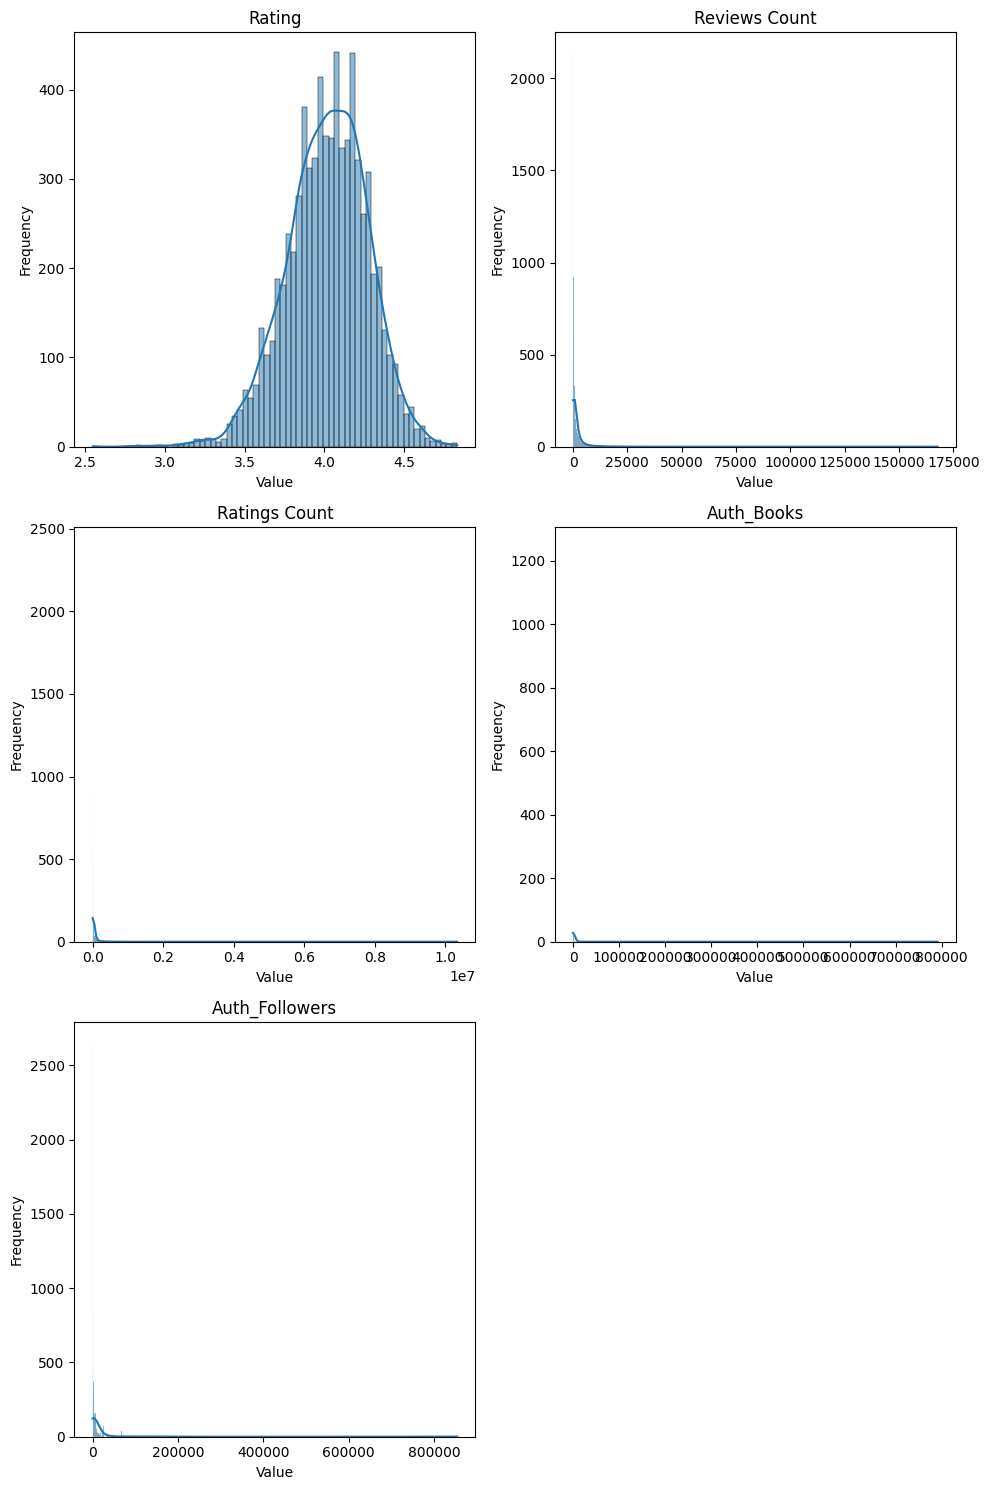

In [819]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the 5 columns you want to plot, including 'Auth_Followers'
columns_to_plot = ['Rating', 'Reviews Count', 'Ratings Count', 'Auth_Books', 'Auth_Followers']

# ... (rest of your code for handling outliers)

# Adjust subplot layout for 5 plots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Plot the displot
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.histplot(combined_df[column], kde=True, ax=axes[row, col])  # Use histplot for displot
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

# Remove the unused subplot (if any)
if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

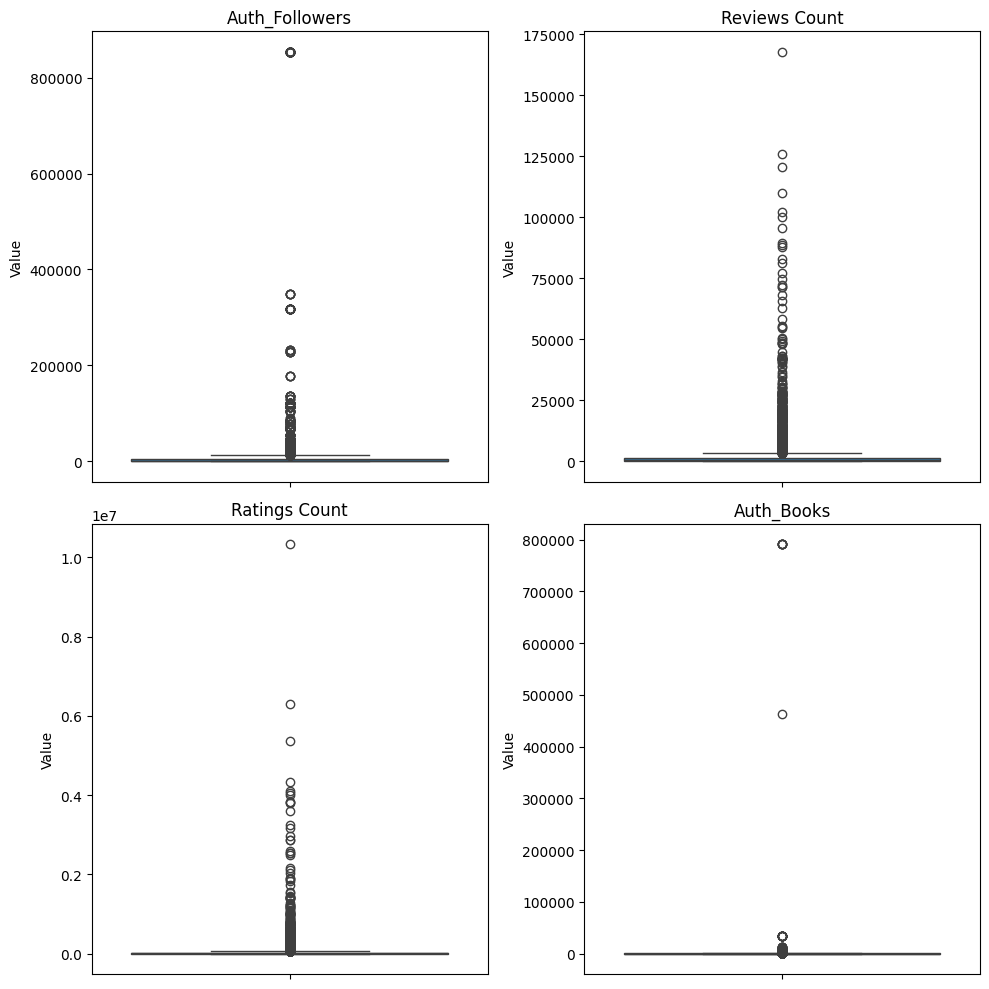

In [820]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the 4 columns you want to plot
columns_to_plot = ['Auth_Followers', 'Reviews Count', 'Ratings Count', 'Auth_Books']

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot the box plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.boxplot(y=combined_df[column], ax=axes[row, col])  # Use boxplot
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [821]:


# Assuming 'Publication Date' is a string Series
# Convert to datetime with dayfirst
combined_df['Publication Date'] = pd.to_datetime(combined_df['Publication Date'], dayfirst=True)

# Check the data type
print(combined_df['Publication Date'].dtype)
combined_df['Publication Date'].unique()

datetime64[ns]


<DatetimeArray>
['1960-07-11 00:00:00', '1925-04-10 00:00:00', '1997-06-26 00:00:00',
 '1945-08-17 00:00:00', '1937-09-21 00:00:00', '1943-04-06 00:00:00',
 '1953-10-19 00:00:00', '1951-07-16 00:00:00', '1950-10-16 00:00:00',
 '1967-01-01 00:00:00',
 ...
 '1697-01-01 00:00:00', '1982-02-01 00:00:00', '1939-09-09 00:00:00',
 '1988-05-12 00:00:00', '1985-09-25 00:00:00', '1997-09-29 00:00:00',
 '1967-08-01 00:00:00', '1994-10-27 00:00:00', '2000-10-02 00:00:00',
 '1988-12-27 00:00:00']
Length: 1777, dtype: datetime64[ns]

In [822]:
import pandas as pd

# Select the columns you want to check for outliers
columns_to_check = ['Rating', 'Reviews Count', 'Ratings Count', 'Auth_Books', 'Auth_Followers','Publication Date']

for column in columns_to_check:
    # Calculate IQR
    Q1 = combined_df[column].quantile(0.25)
    Q3 = combined_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identify outlier records
    outliers_s = combined_df[((combined_df[column] < lower_bound))]
    outliers_b =combined_df[(combined_df[column] > upper_bound)]

    # Print outlier records for the current column
    print(f"Outliers in column '{column}':")
    print(outliers_b.min())
    print("-" * 30)  # Separator between columns


Outliers in column 'Rating':
Genre                           Animals
Publication Date    1927-01-01 00:00:00
Author               Ani a Nandri Cudla
Title                         Checkmate
Rating                             4.69
Ratings Count                         5
Reviews Count                         0
Auth_Books                          1.0
Auth_Followers                      1.0
dtype: object
------------------------------
Outliers in column 'Reviews Count':
Genre               Biography,Nonfiction,History,Africa,Memoir,Aut...
Publication Date                                  1886-01-01 00:00:00
Author                                                Adam Hochschild
Title                                                       About Boy
Rating                                                           3.34
Ratings Count                                                   23565
Reviews Count                                                    3413
Auth_Books                              

In [823]:
import pandas as pd

# Select the columns you want to check for outliers
columns_to_check = ['Rating', 'Reviews Count', 'Ratings Count', 'Auth_Books', 'Auth_Followers','Publication Date']

for column in columns_to_check:
    # Calculate IQR
    Q1 = combined_df[column].quantile(0.25)
    Q3 = combined_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    combined_df = combined_df[((combined_df[column] > lower_bound))&((combined_df[column] <upper_bound))]




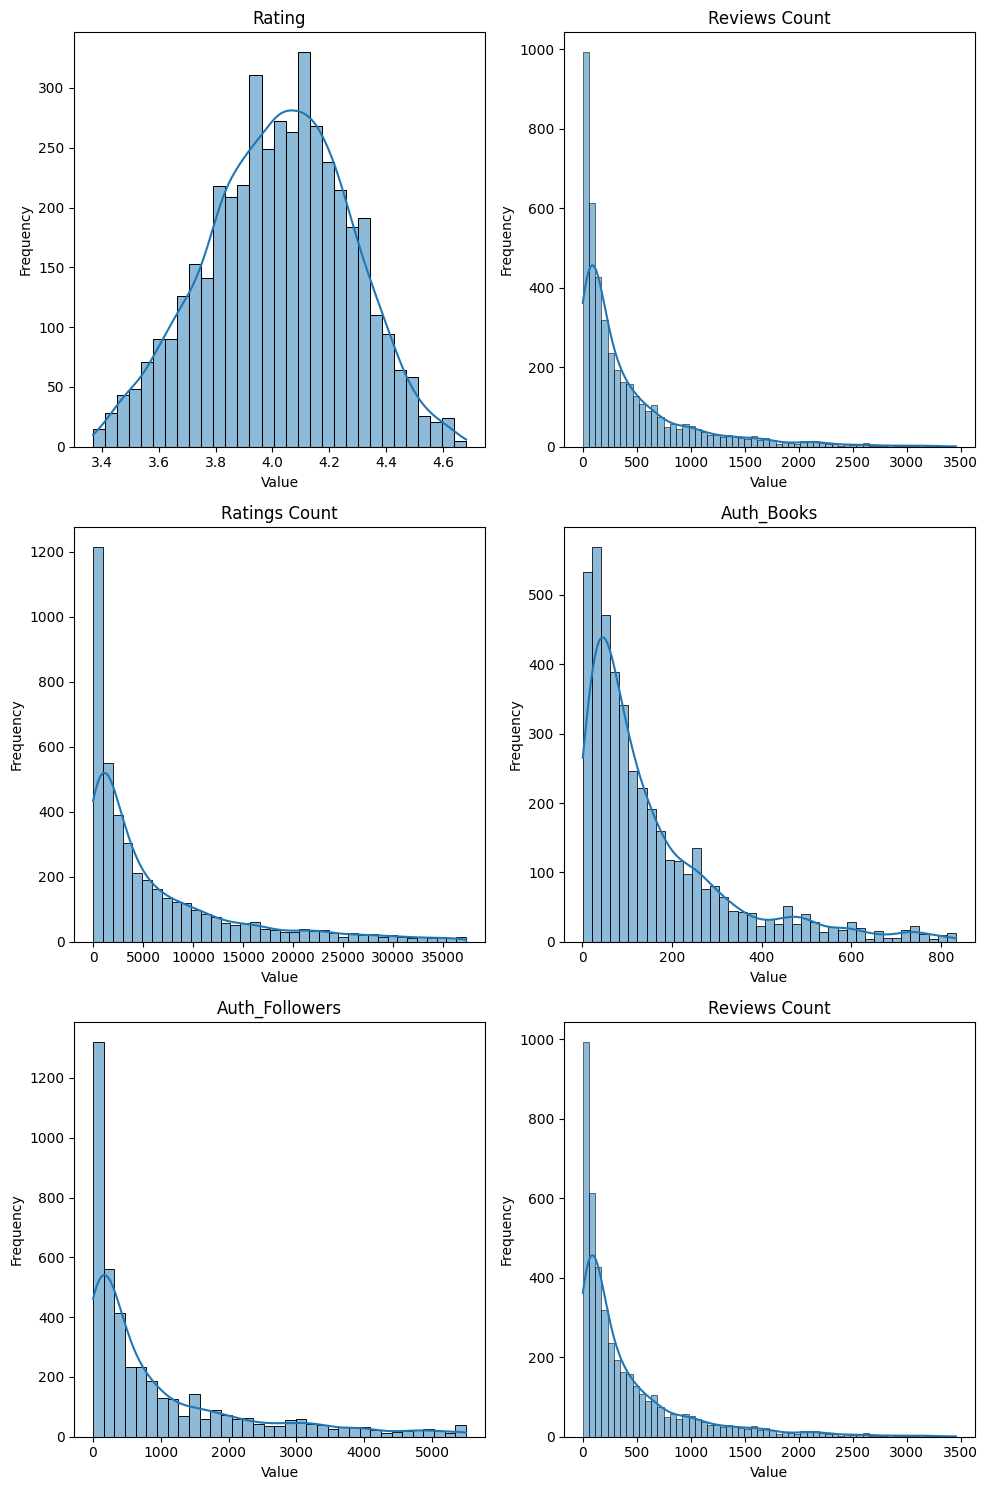

In [824]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the 5 columns you want to plot, including 'Auth_Followers'
columns_to_plot = ['Rating', 'Reviews Count', 'Ratings Count', 'Auth_Books', 'Auth_Followers','Reviews Count']

# ... (rest of your code for handling outliers)

# Adjust subplot layout for 5 plots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Plot the displot
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.histplot(combined_df[column], kde=True, ax=axes[row, col])  # Use histplot for displot
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

# Remove the unused subplot (if any)
if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

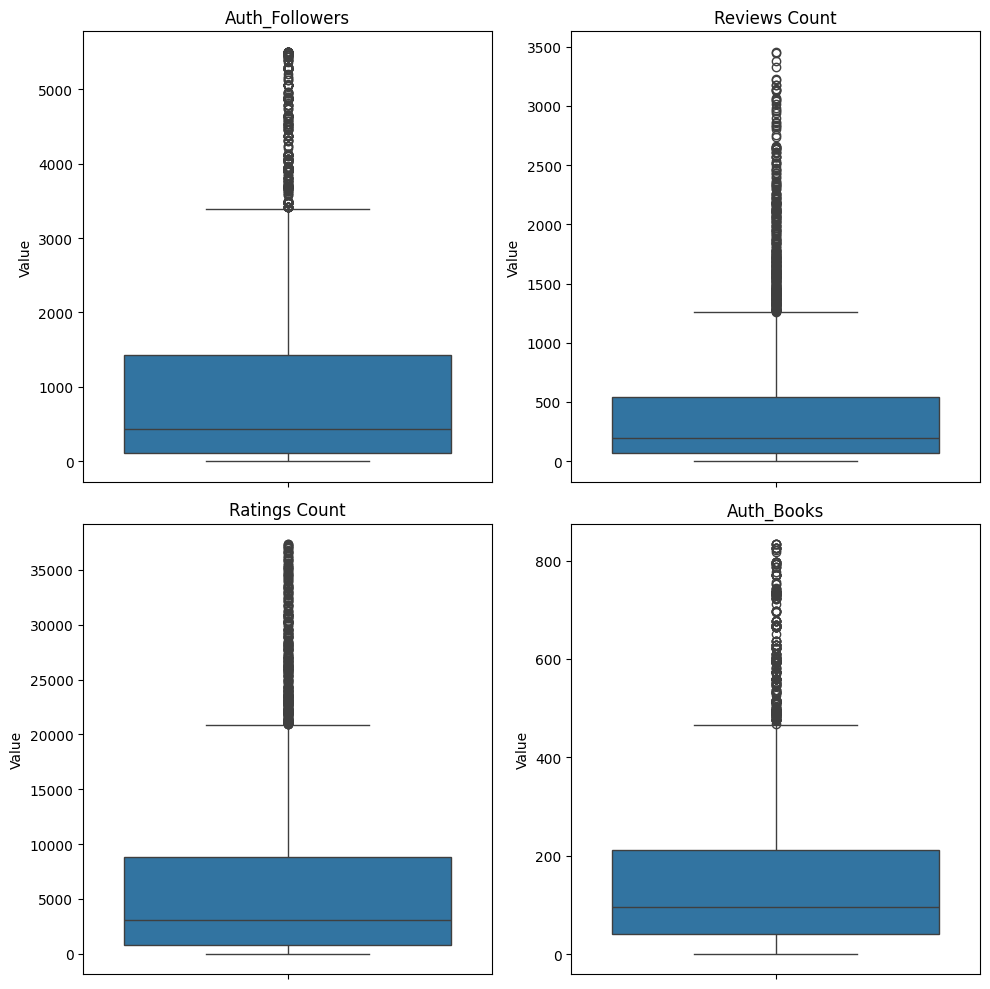

In [825]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select the 4 columns you want to plot
columns_to_plot = ['Auth_Followers', 'Reviews Count', 'Ratings Count', 'Auth_Books']

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot the box plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.boxplot(y=combined_df[column], ax=axes[row, col])  # Use boxplot
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [826]:
combined_df.to_csv('book data2.csv', index=False)

In [827]:
combined_df['Title'].unique()

array(['Sometimes Great Notion', 'The Gulag Archipelago',
       'The Alexandria Quartet', ..., 'Everlastin',
       'Secolul meu confesiunile unui intelectual european',
       'Fever Urbicand'], dtype=object)

In [828]:
combined_df.isnull().sum()

,0
Genre,0
Publication Date,0
Author,0
Title,0
Rating,0
Ratings Count,0
Reviews Count,0
Auth_Books,0
Auth_Followers,0


In [829]:
combined_df['Genre'].unique()

array(['Fiction,Classics,Literature,Novels,Literary,Fiction,American,Historical Fiction,more',
       'History,Nonfiction,Classics,Russia,Politics,Biography,Russian,Literature,more',
       'Fiction,Classics,Historical Fiction,Literature,Novels,Egypt,Africa,more',
       ...,
       'Romance,Paranormal,Historical Ghosts,Paranormal,Romance,Fiction,Historical Romance,more',
       'History,Nonfiction,Poland,Memoir,Polish,Literature,Biography,Poetry,more',
       'Comics,Graphic,Novels,Bande,Dessinée,Fantasy,France,Science,Fiction,Architecture,more'],
      dtype=object)

In [830]:
combined_df.describe()

,Publication Date,Rating,Ratings Count,Reviews Count,Auth_Books,Auth_Followers
count,4374,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000
mean,1974-05-30 17:42:42.962962960,4.020896,6320.259259,418.771148,155.291495,993.262917
min,1909-01-01 00:00:00,3.370000,2.000000,0.000000,1.000000,1.000000
25%,1960-01-01 00:00:00,3.850000,806.500000,65.000000,41.000000,111.000000
50%,1980-01-01 00:00:00,4.030000,3036.500000,199.000000,96.000000,434.000000
75%,1993-01-01 00:00:00,4.200000,8849.250000,543.500000,211.000000,1425.000000
max,2015-10-20 00:00:00,4.680000,37330.000000,3457.000000,833.000000,5503.000000
std,NaN,0.247892,7865.335053,546.078165,164.401940,1269.975073
